# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 28, 2022 at 11:59pm**

## Imports

In [4]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

ModuleNotFoundError: No module named 'tests_hw5'

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 18 | 22 |
| **Actual no disease**       | 10 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 23 | 17 |
| **Actual no disease**       | 20 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

### BEGIN SOLUTION

Having the disease is likely to be the "positive" class in the above example; we are likely to be interested in spotting the patients having the disease.  

### END SOLUTION

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [1]:
results_dict = {"A": {}, "B": {}}

In [2]:
results_dict["A"]["accuracy"] = None
results_dict["B"]["accuracy"] = None

### BEGIN SOLUTION

results_dict["A"]["accuracy"] = 118 / 150
results_dict["B"]["accuracy"] = 113 / 150

### END SOLUTION

In [4]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [5]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [5]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

### BEGIN SOLUTION

Since Model A has higher accuracy than model B, I would pick model A simply based on this information. 

### END SOLUTION

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [6]:
results_dict["A"]["precision"] = None
results_dict["B"]["precision"] = None
results_dict["A"]["recall"] = None
results_dict["B"]["recall"] = None
results_dict["A"]["f1"] = None
results_dict["B"]["f1"] = None


### BEGIN SOLUTION


def calculate_f1(precision, recall):
    return (2 * precision * recall) / (precision + recall)


results_dict["A"]["precision"] = 18 / 28
results_dict["B"]["precision"] = 23 / 43
results_dict["A"]["recall"] = 18 / 40
results_dict["B"]["recall"] = 23 / 40
results_dict["A"]["f1"] = calculate_f1(
    results_dict["A"]["precision"], results_dict["A"]["recall"]
)
results_dict["B"]["f1"] = calculate_f1(
    results_dict["B"]["precision"], results_dict["B"]["recall"]
)
### END SOLUTION

In [9]:
sha1(str(calculate_f1(
    results_dict["B"]["precision"], results_dict["B"]["recall"]
)).encode("utf8")).hexdigest()

'99b6fb877dc6820343b4dc0eff76c1f9aae7370f'

In [8]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [9]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [10]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [7]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333
precision,0.642857,0.534884
recall,0.450000,0.575000
f1,0.529412,0.554217


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

### BEGIN SOLUTION

Recall would be more important than precision in this case because it's better to be a bit more aggressive in spotting the people with disease even with the risk of more false positives than incorrectly classifying them as non-diseased. 

I would pick Model B because it has a better recall and `f1 score`.       

### END SOLUTION

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

### BEGIN SOLUTION

- [Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)
Recall and f1 score would be more relevant.  

- [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
Precision and f1 score would be more relevant. 

(Full marks if there are 2 or more reasonable examples.)

### END SOLUTION

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [15]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

### BEGIN SOLUTION

In [16]:
train_df["churn"].value_counts(normalize=True)

False    0.850407
True     0.149593
Name: churn, dtype: float64

Yes, there is class imbalance. Only around 15% of the examples in the training set belong to the "True" class, which is of our interest. We are likely to be interested in finding churned customers so that the company can offer them promotions etc and so predicting "True" examples correctly is more important to us.  

### END SOLUTION

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

### BEGIN SOLUTION

In [17]:
cor = train_df.corr()
cor

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.001182,-0.014392,0.004172,0.041893,0.004172,-0.007104,0.007933,-0.007079,-0.022323,-0.018192,-0.022311,0.012221,0.007324,0.012280,-0.006801,0.030816
area code,-0.001182,1.000000,-0.010420,-0.018004,-0.000605,-0.018000,0.008661,0.004977,0.008698,0.007058,0.038585,0.007019,-0.024145,-0.032345,-0.024228,0.025106,-0.007699
number vmail messages,-0.014392,-0.010420,1.000000,-0.011443,-0.001229,-0.011445,-0.006903,0.001281,-0.006877,-0.015654,0.005661,-0.015692,0.007540,0.005228,0.007516,0.000817,-0.079242
total day minutes,0.004172,-0.018004,-0.011443,1.000000,-0.005629,1.000000,0.023442,0.031951,0.023441,0.007811,0.015868,0.007758,-0.005937,-0.002756,-0.005812,-0.021350,0.215746
total day calls,0.041893,-0.000605,-0.001229,-0.005629,1.000000,-0.005626,-0.015018,0.009994,-0.015008,0.030066,-0.007456,0.030064,0.005074,0.005216,0.005156,-0.020813,0.016546
total day charge,0.004172,-0.018000,-0.011445,1.000000,-0.005626,1.000000,0.023457,0.031956,0.023456,0.007816,0.015864,0.007762,-0.005940,-0.002758,-0.005814,-0.021356,0.215749
total eve minutes,-0.007104,0.008661,-0.006903,0.023442,-0.015018,0.023457,1.000000,-0.000852,1.000000,-0.025507,0.013250,-0.025524,-0.007664,-0.008652,-0.007760,-0.026125,0.087715
total eve calls,0.007933,0.004977,0.001281,0.031951,0.009994,0.031956,-0.000852,1.000000,-0.000838,0.005060,0.002709,0.005108,0.013521,0.027803,0.013485,0.011812,0.024840
total eve charge,-0.007079,0.008698,-0.006877,0.023441,-0.015008,0.023456,1.000000,-0.000838,1.000000,-0.025504,0.013255,-0.025521,-0.007682,-0.008652,-0.007778,-0.026142,0.087705
total night minutes,-0.022323,0.007058,-0.015654,0.007811,0.030066,0.007816,-0.025507,0.005060,-0.025504,1.000000,0.006018,0.999999,-0.021817,-0.022329,-0.021844,-0.009440,0.026606


In [18]:
possibly_most_relevant = [
    "total day minutes",
    "total day charge",
    "total eve minutes",
    "total eve charge",
    "total intl minutes",
    "customer service calls",
    "churn",
]
cor = train_df[possibly_most_relevant].corr()
cor

,total day minutes,total day charge,total eve minutes,total eve charge,total intl minutes,customer service calls,churn
total day minutes,1.000000,1.000000,0.023442,0.023441,-0.005937,-0.021350,0.215746
total day charge,1.000000,1.000000,0.023457,0.023456,-0.005940,-0.021356,0.215749
total eve minutes,0.023442,0.023457,1.000000,1.000000,-0.007664,-0.026125,0.087715
total eve charge,0.023441,0.023456,1.000000,1.000000,-0.007682,-0.026142,0.087705
total intl minutes,-0.005937,-0.005940,-0.007664,-0.007682,1.000000,0.009233,0.064230
customer service calls,-0.021350,-0.021356,-0.026125,-0.026142,0.009233,1.000000,0.216641
churn,0.215746,0.215749,0.087715,0.087705,0.064230,0.216641,1.000000


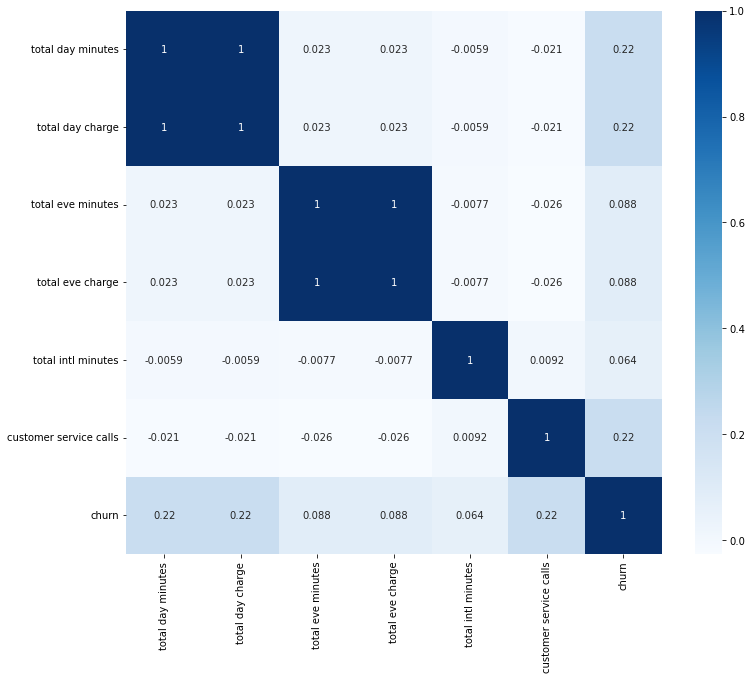

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

We see that we have some colinear features in the data (examples: total day minutes and total day charge). 

### END SOLUTION 

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [20]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

### BEGIN SOLUTION

In [21]:
train_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False


In [22]:
train_df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [23]:
train_df["voice mail plan"].unique()

array(['no', 'yes'], dtype=object)

In [24]:
train_df["area code"].unique()

array([415, 510, 408])

In [25]:
train_df["state"].unique()

array(['NE', 'WI', 'NJ', 'NV', 'HI', 'NM', 'MO', 'MI', 'SD', 'WY', 'GA',
       'WV', 'KS', 'DC', 'CT', 'TN', 'AK', 'WA', 'MS', 'CA', 'ND', 'MD',
       'AZ', 'RI', 'SC', 'AL', 'MA', 'ME', 'AR', 'VA', 'FL', 'NY', 'DE',
       'NH', 'MN', 'KY', 'NC', 'OK', 'OR', 'ID', 'IN', 'LA', 'UT', 'PA',
       'TX', 'OH', 'MT', 'IA', 'VT', 'IL', 'CO'], dtype=object)

In [26]:
train_df["state"].value_counts()

WV    70
NY    64
OR    59
TX    59
OH    58
MN    58
MI    57
CT    54
MT    54
WY    54
WI    54
MD    53
AL    51
ID    51
VT    51
NJ    50
AZ    50
ME    49
UT    48
RI    48
FL    48
MA    47
ND    47
DE    46
NC    45
OK    45
AR    44
KS    44
MS    43
VA    43
MO    43
NM    43
IN    42
GA    41
KY    41
AK    40
NH    40
IL    39
CO    39
SC    39
SD    39
NV    39
TN    38
DC    38
NE    38
WA    34
PA    34
HI    33
LA    31
IA    30
CA    28
Name: state, dtype: int64

In [27]:
len(train_df["phone number"].unique())

2333

The plan:

1. One-hot encode `area code`, `international plan` and `voice mail plan`, `state`. Note that `international plan` and `voice mail plan` and binary. But, if we use `drop='if_binary'` then a one-hot encoding is equivalent to a "binary encoding" because we just get one column that is either 0 or 1.
2. Drop `phone number`, as it is a unique identifier that is unlikely to be useful.
3. Treat the rest as numeric and standardize them.

In [28]:
categorical_features = ["area code", "state"]
binary_features = ["international plan", "voice mail plan"]
drop_features = ["phone number"]
numeric_features = list(
    set(train_df.columns)
    - set(["churn"])
    - set(binary_features)
    - set(categorical_features)
    - set(drop_features)
)

In [29]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ("drop", drop_features),
)

### END SOLUTION

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

### BEGIN SOLUTION

In [30]:
preprocessor.fit(X_train);

In [31]:
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(drop='if_binary'),
 'onehotencoder-2': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'drop': 'drop'}

In [32]:
new_columns = (
    numeric_features
    + binary_features
    + list(
        preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out(
            categorical_features
        )
    )
)

In [33]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)

In [34]:
X_train_enc.head()

,customer service calls,total day minutes,total eve minutes,total intl calls,total intl charge,total day charge,total intl minutes,total day calls,total night minutes,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1402,-0.415269,0.618769,0.069871,-0.200722,-1.644994,0.618927,-1.645501,-0.721211,1.088667,0.069926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1855,0.337507,-1.293778,-1.167277,0.198158,0.222249,-1.293517,0.227019,1.655252,-2.162302,-1.166291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.337507,-0.609809,-2.210130,-0.200722,1.916105,-0.609654,1.919489,0.169963,0.369287,-2.211244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,-0.415269,0.998345,-0.754894,-0.599603,-0.097850,0.998611,-0.097071,-0.473663,1.597736,-0.755774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,0.337507,-0.994886,1.195994,1.793679,0.408973,-0.994731,0.407069,0.764078,0.793839,1.196515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### END SOLUTION

<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

### BEGIN SOLUTION

(1) We use OHE because the actual numeric values of the area codes are meaningless - they are categories. 

(2) Here are the possible values:

In [35]:
X_train["area code"].unique()

array([415, 510, 408])

(3) Here are the new features:

In [36]:
area_code_cols = X_train_enc.columns[X_train_enc.columns.str.startswith("area code")]
area_code_cols

Index(['area code_408', 'area code_415', 'area code_510'], dtype='object')

(4) Here are the new representations (since we didn't use `drop='first'` here:

- '408' is represented as [1,0,0]
- '415' is represented as [0,1,0]
- '510' is represented as [1,0,0]

In [37]:
X_train_enc.loc[X_train["area code"] == 408][area_code_cols].iloc[0].values

array([1., 0., 0.])

In [38]:
X_train_enc.loc[X_train["area code"] == 415][area_code_cols].iloc[0].values

array([0., 1., 0.])

In [39]:
X_train_enc.loc[X_train["area code"] == 510][area_code_cols].iloc[0].values

array([0., 0., 1.])

### END SOLUTION

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

### BEGIN SOLUTION

In [40]:
dc = DummyClassifier()

In [41]:
score_types = ["accuracy", "precision", "recall", "f1"]

In [42]:
for score_type in score_types:
    print(
        "%-9s: %.2f"
        % (score_type, cross_val_score(dc, X_train, y_train, scoring=score_type).mean())
    )

accuracy : 0.85
precision: 0.00
recall   : 0.00
f1       : 0.00


/Users/kvarada/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kvarada/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kvarada/opt/miniconda3/envs/571/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kvarada/opt/miniconda3/envs/571/lib/pyt

We get a warning because `DummyClassifier` always predicts False (no churn), so the precision is undefined. 

### END SOLUTION

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

### BEGIN SOLUTION

In [43]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

In [44]:
pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       0.024102
score_time     0.004246
test_score     0.855978
train_score    0.866481
dtype: float64

In [45]:
for score_type in score_types:
    print(
        "%-9s: %.2f"
        % (
            score_type,
            cross_val_score(pipe, X_train, y_train, scoring=score_type).mean(),
        )
    )

accuracy : 0.86
precision: 0.55
recall   : 0.21
f1       : 0.30


These results above are surprisingly similar to what we got with `DummyClassifier`. The accuracy is roughly the same. While the precision is now better (and at least defined!), the recall and F1-scores are still very poor. The low recall indicates that we're hardly ever predicting True. This is likely due to the class imbalance. 

### END SOLUTION

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

### BEGIN SOLUTION

In [46]:
pipe_balanced = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)

In [47]:
pd.DataFrame(
    cross_validate(pipe_balanced, X_train, y_train, return_train_score=True)
).mean()

fit_time       0.026823
score_time     0.004034
test_score     0.760807
train_score    0.776252
dtype: float64

In [48]:
for score_type in score_types:
    print(
        "%-9s: %.2f"
        % (
            score_type,
            cross_val_score(pipe_balanced, X_train, y_train, scoring=score_type).mean(),
        )
    )

accuracy : 0.76
precision: 0.35
recall   : 0.70
f1       : 0.47


Our accuracy is now lower, but the recall is now much better. The F1-score is better now as well.

### END SOLUTION

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

### BEGIN SOLUTION

In [49]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

In [50]:
param_grid = {
    "logisticregression__C": 2.0 ** np.arange(-4, 4),
    "logisticregression__class_weight": [None, "balanced"],
}

In [51]:
search = GridSearchCV(
    pipe,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
)

In [52]:
search.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [53]:
grid_results_df = pd.DataFrame(search.cv_results_)[
    [
        "mean_test_score",
        "mean_train_score",
        "param_logisticregression__C",
        "param_logisticregression__class_weight",
        "rank_test_score",
    ]
]
grid_results_df = grid_results_df.sort_values(by="mean_test_score", ascending=False)
grid_results_df

,mean_test_score,mean_train_score,param_logisticregression__C,param_logisticregression__class_weight,rank_test_score
1,0.481077,0.496341,0.0625,balanced,1
3,0.477458,0.503381,0.125,balanced,2
5,0.475169,0.507852,0.25,balanced,3
7,0.469676,0.513824,0.5,balanced,4
9,0.467027,0.512418,1.0,balanced,5
11,0.465481,0.512885,2.0,balanced,6
15,0.461991,0.513988,8.0,balanced,7
13,0.461813,0.514124,4.0,balanced,8
14,0.312894,0.371034,8.0,None,9
12,0.309597,0.372006,4.0,None,10


### END SOLUTION

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

### BEGIN SOLUTION

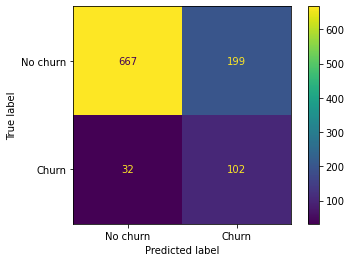

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay.from_estimator(
    search, X_test, y_test, display_labels=["No churn", "Churn"]
)  # recommended approach in scikit-learn 1.0

In [55]:
print(
    classification_report(
        y_test, search.predict(X_test), target_names=["No churn", "Churn"]
    )
)

              precision    recall  f1-score   support

    No churn       0.95      0.77      0.85       866
       Churn       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



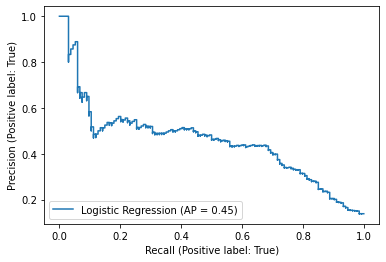

In [56]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(
    search, X_test, y_test, name="Logistic Regression"
)
# recommended approach in scikit-learn 1.0

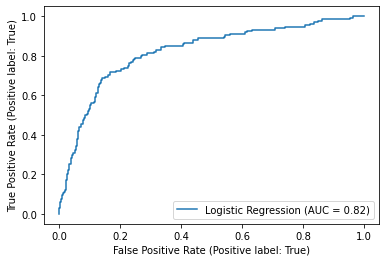

In [57]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(search, X_test, y_test, name="Logistic Regression")
# recommended approach in scikit-learn 1.0

In [58]:
from sklearn.metrics import roc_auc_score

print("AUC score: %0.3f" % (roc_auc_score(y_test, search.predict_proba(X_test)[:, 1])))

AUC score: 0.821


Some observations: 

1. The best hyperparameters found by our grid search are: C = 0.0625 and class_weight="balanced" with a validation f1-score of 0.48. The test f1 score is 0.47 which is comparable to the validation score. So seems like we did not end up overfitting the validation set. 
2. The average precision score is 0.45 and seems like we have a reasonable compromise around recall value of ~0.70. 
3. AUC is 0.82. So on average about 82% of the time positive examples have a bigger score compared to the negative examples. 

### END SOLUTION

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [59]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

### BEGIN SOLUTION

In [60]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9950,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875
3547,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715
4448,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917
6984,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197
4432,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140


In [61]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870716,28.570918,5.422508,1.096515,1434.115734,3.064722,35.627757,-119.566976,2.069687
std,1.900132,12.582281,2.520931,0.491311,1130.309986,10.624706,2.134543,2.000519,1.154148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.430476,1.005825,789.000000,2.429013,33.930000,-121.800000,1.194000
50%,3.529400,29.000000,5.227170,1.048765,1170.000000,2.816122,34.250000,-118.490000,1.804000
75%,4.750375,37.000000,6.051005,1.099493,1735.000000,3.278954,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


All our features are numeric. The only transformation which seems relevant here is scaling.

In [62]:
preprocessor = StandardScaler()

In [63]:
X_train, y_train = train_df.drop(columns=["MedHouseVal"]), train_df["MedHouseVal"]
X_test, y_test = test_df.drop(columns=["MedHouseVal"]), test_df["MedHouseVal"]

### END SOLUTION

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

### BEGIN SOLUTION

In [64]:
dr = DummyRegressor()
pd.DataFrame(cross_validate(dr, X_train, y_train, return_train_score=True)).mean()

fit_time       0.000986
score_time     0.000309
test_score    -0.000147
train_score    0.000000
dtype: float64

By default we get $R^2$ score.

### END SOLUTION

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [65]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

### BEGIN SOLUTION

In [66]:
def score_with_metrics(models, preprocessor, scoring="f1"):
    """
    Return cross-validation scores for given models as a dataframe.

    Parameters
    ----------
    models : dict
        a dictionary with names and scikit-learn models
    scoring : list/dict/string
        scoring parameter values for cross-validation

    Returns
    ----------
        None

    """
    results_df = {}
    for (name, model) in models.items():
        pipeline = make_pipeline(preprocessor, model)
        scores = cross_validate(
            pipeline, X_train, y_train, return_train_score=True, scoring=scoring
        )
        df = pd.DataFrame(scores)
        results_df[name] = df.mean()
    return pd.DataFrame(results_df)

In [67]:
score_with_metrics(models, preprocessor, scoring=score_types_reg)

,Ridge,Random Forest
fit_time,0.004105,4.979195
score_time,0.002022,0.062705
test_neg_mean_squared_error,-0.683433,-0.262279
train_neg_mean_squared_error,-0.524369,-0.036709
test_neg_root_mean_squared_error,-0.810381,-0.512021
train_neg_root_mean_squared_error,-0.724132,-0.191583
test_neg_mean_absolute_error,-0.535444,-0.333802
train_neg_mean_absolute_error,-0.531388,-0.124655
test_r2,0.481744,0.802863
train_r2,0.606300,0.972436


1. Both Ridge and RandomForestRegressor are performing better than the DummyRegressor. 
2. Random forest model has the highest R^2 score, neg MAPE, neg RMSE and neg MSE. With this model on average we have 19% error on prediction. That said, it seems to be much slower compared to Ridge. 

### END SOLUTION

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [68]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

### BEGIN SOLUTION

In [69]:
pipe = make_pipeline(StandardScaler(), Ridge())

random_search_ridge = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring=mape_scorer,
    random_state=123,
)
random_search_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x123bf95e0>},
                   random_state=123,
                   scoring=make_scorer(mape, greater_is_better=False),
                   verbose=1)

We are not getting much different results with optimized `alpha` compared to the default `alpha` used in `sklearn`. This might be because Ridge is probably not the best model for this dataset. The train score is also quite high suggesting that the model is underfit. 

### END SOLUTION

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

### BEGIN SOLUTION

In [70]:
print("Random Search best hyperparameters: %s" % (random_search_ridge.best_params_))
print("Random Search best model score: %0.3f" % (random_search_ridge.best_score_))
print(
    "Train score on the full train set: %0.3f"
    % (random_search_ridge.score(X_train, y_train))
)
print(
    "Test score on the full test set: %0.3f"
    % (random_search_ridge.score(X_test, y_test))
)

Random Search best hyperparameters: {'ridge__alpha': 26.789982776216593}
Random Search best model score: -31.887
Train score on the full train set: -31.835
Test score on the full test set: -31.084


### END SOLUTION

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

### BEGIN SOLUTION

In [71]:
df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": random_search_ridge.best_estimator_.named_steps["ridge"].coef_,
    }
)
df.sort_values("coefficients")

,features,coefficients
6,Latitude,-0.870521
7,Longitude,-0.835697
2,AveRooms,-0.276697
5,AveOccup,-0.041684
4,Population,-0.006641
1,HouseAge,0.117318
3,AveBedrms,0.311874
0,MedInc,0.834711


Given this model and the dataset, increasing latitude and longitude would result in lower housing prices, whereas increasing median income, and average bedrooms would result in higher housing prices. 

### END SOLUTION

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 